In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [33]:
gold_data = pd.read_csv('gld_price_data.csv')

In [34]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [35]:
gold_data.shape

(2290, 6)

In [36]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [37]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [38]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [39]:
X = gold_data.drop(['Date'] , axis = 1 )
correlation = X.corr()

<Axes: >

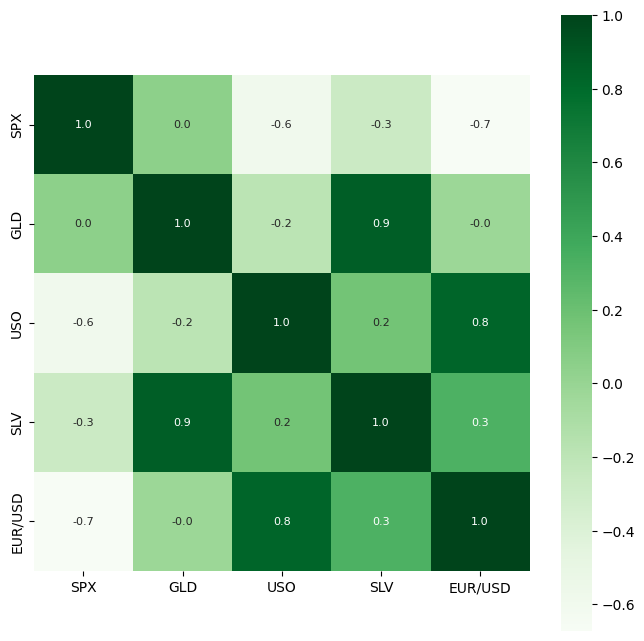

In [40]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [41]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\patel\AppData\Local\Temp\ipykernel_22832\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

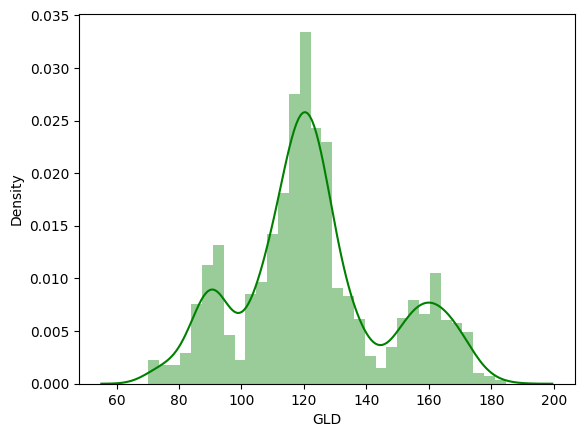

In [42]:
sns.distplot(gold_data['GLD'],color='green')

In [43]:
Y = gold_data['GLD']

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=3)

In [45]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [46]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[162.02240157 127.59379913 124.55399824 118.94860055 125.72200037
  85.09919842 171.46780091 155.29679926 108.05380252 130.37009984
 119.80660094 124.58789809 142.4078998  105.65879996  80.79289917
 123.71110203 139.24820014  88.28280001  92.32819792 127.84389794
 126.30449894 149.84590368 117.7324012  154.67699944 130.35559787
 130.47359921 119.76830091 112.0112002  170.96060046 157.73620035
 126.23290015 153.00550053 128.82259855 122.90959797 116.01909982
 155.35359982 116.04119991 121.13009812 104.78110039 107.71739932
 133.50939958  84.78229904 159.29500075 121.24279906 122.98059915
 156.2917995  119.67310032 116.06529987 169.65889977 116.12090182
 135.21350059 162.00589919 159.5269983  151.64459946 124.3948001
 115.79290034 167.61409962 115.54630178 165.77610099  84.38599917
 122.13059941 122.06200054 119.33719842 172.2886986  119.40389934
 181.0059958  160.62709683 135.08560167 114.72260045  93.13679767
 172.20549868 117.72489884 118.52419768 124.78009958 145.63810192
  91.187399

In [47]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9999754317045594


In [48]:
Y_test = list(Y_test)

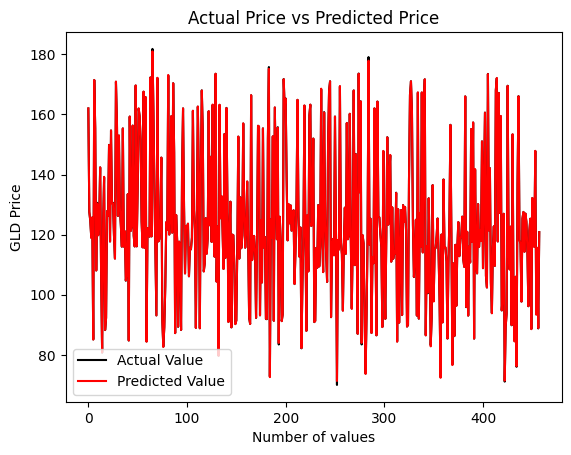

In [49]:
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

We can conclude that after watching the above graph our predicted values are almost accurate as compared to actual values (because we are barely able to see black lines in the graph at any point.)